# Customer Sentiment Analysis

***Objective:***

As a Data Analyst at Flipkart, you have been tasked with gauging customer sentiment towards the iPhone 15 128GB model. The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users. By extracting and processing customer reviews, you will derive insights about the overall sentiment (positive or negative) surrounding the product, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.

# Libraries and Tools:
 
***Selenium:*** For automating the web scraping process.

***BeautifulSoup:*** For parsing HTML and extracting review details.

***Pandas:*** For data cleaning, processing, and analysis.

***TextBlob:*** For performing sentiment analysis on the review text.

***Matplotlib/Seaborn:*** For visualizations like sentiment distribution and word clouds.



 


***1. Data Collection (Web Scraping):***

***Tool:*** Selenium and BeautifulSoup

***Task:*** Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 15 128GB model. Each review should include:

***Username:*** The name of the reviewer.

***Rating:*** The rating provided by the user (1 to 5 stars).

***Review Text:*** The content of the customer's review, which may contain valuable information regarding their experience with the product.

***Steps:-***

Set up Selenium to automate browser interactions, navigate to Flipkart’s product page for iPhone 15 128GB, and extract the reviews.

extract the relevant details (username, rating, and review text).

Ensure that the scraper handles pagination to retrieve reviews from multiple pages if necessary.

In [1]:
#Use Libraries
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

In [5]:
# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-green-128-gb/product-reviews/itm235cd318bde73?pid=MOBGTAGPYYWZRUJX&lid=LSTMOBGTAGPYYWZRUJXRK8B5V&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Scrape names
    temp_names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in temp_names:
        Names.append(name.text)

    # Scrape cities
    temp_cities = soup.find_all("p", {"class": "MztJPv"}) 
    for city in temp_cities:
        Cities.append(city.text)

    # Scrape dates
    temp_dates = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in temp_dates:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Scrape reviews
    temp_reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for review in temp_reviews:
        Reviews.append(review.text)

    # Scrape ratings
    temp_ratings = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in temp_ratings:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

In [7]:
import pandas as pd
df = pd.DataFrame({
    "Username": Names[:-3],
    "city": Cities[:-3],
    "Dates": Actual_Dates[-3],
    "reviews": Reviews[:-3],
    "Rating": Ratings
})

df

,Username,city,Dates,reviews,Rating
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Feb, 2024",Very niceREAD MORE,4
1,bijaya mohanty,"Certified Buyer, Baleshwar","Feb, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,CHETAN TILWALIA,"Certified Buyer, Loni","Feb, 2024",Nice 👌READ MORE,5
3,Ajin V,"Certified Buyer, Balaghat","Feb, 2024",High quality camera😍READ MORE,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Feb, 2024",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
206,Leo Jonas Doyom,"Certified Buyer, Naharlagun","Feb, 2024",Great device The 60hz is not a big deal like t...,5
207,sandeep Debroy sandeep Debroy,"Certified Buyer, Kailashahar","Feb, 2024","Nice product,,and delivery is awesomeREAD MORE",5
208,Harry Neemranya,"Certified Buyer, Jaipur","Feb, 2024",Amazing design quality and I love this iPhoneR...,5
209,Esha Omkar,"Certified Buyer, Rishikesh","Feb, 2024",Everything is good i got it at65 best deal so ...,5


In [6]:
print(len(Names))
print(len(Cities))
print(len(Actual_Dates))
print(len(Reviews))
print(len(Ratings))


214
214
214
214
211


# 2. Data Cleaning and Preprocessing:

***Tool:*** Pandas

***Task:*** Clean and preprocess the scraped data for analysis.

Steps:

***Remove duplicates:*** Eliminate any duplicate reviews to ensure data quality.

***Handle missing values:*** Address missing or incomplete data, such as missing review text or rating, by either removing rows or filling in missing values if applicable.

***Text preprocessing:***

***Convert the review text to lowercase.***

Remove irrelevant characters (e.g., special characters, punctuation, and extra spaces).

Tokenize the text into individual words.

Remove stop words (commonly used words that do not add significant meaning to sentiment analysis).

Perform lemmatization to convert words into their base form (e.g., "running" → "run").

In [8]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  211 non-null    object
 1   city      211 non-null    object
 2   Dates     211 non-null    object
 3   reviews   211 non-null    object
 4   Rating    211 non-null    object
dtypes: object(5)
memory usage: 8.4+ KB


In [9]:
# Drop the duplicates from the dataframe
df = df.copy()
df = df.drop_duplicates()
df

,Username,city,Dates,reviews,Rating
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Feb, 2024",Very niceREAD MORE,4
1,bijaya mohanty,"Certified Buyer, Baleshwar","Feb, 2024",Just go for it.Amazing one.Beautiful camera wi...,5
2,CHETAN TILWALIA,"Certified Buyer, Loni","Feb, 2024",Nice 👌READ MORE,5
3,Ajin V,"Certified Buyer, Balaghat","Feb, 2024",High quality camera😍READ MORE,5
4,Prithivi Boruah,"Certified Buyer, Bokajan","Feb, 2024",Camera Quality Is Improved Loving ItREAD MORE,5
...,...,...,...,...,...
206,Leo Jonas Doyom,"Certified Buyer, Naharlagun","Feb, 2024",Great device The 60hz is not a big deal like t...,5
207,sandeep Debroy sandeep Debroy,"Certified Buyer, Kailashahar","Feb, 2024","Nice product,,and delivery is awesomeREAD MORE",5
208,Harry Neemranya,"Certified Buyer, Jaipur","Feb, 2024",Amazing design quality and I love this iPhoneR...,5
209,Esha Omkar,"Certified Buyer, Rishikesh","Feb, 2024",Everything is good i got it at65 best deal so ...,5


In [10]:
# Convert the Name column data into Title Case
df['sername'] = df['Username'].str.title()
df.head()

,Username,city,Dates,reviews,Rating,sername
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Feb, 2024",Very niceREAD MORE,4,Mousam Guha Roy
1,bijaya mohanty,"Certified Buyer, Baleshwar","Feb, 2024",Just go for it.Amazing one.Beautiful camera wi...,5,Bijaya Mohanty
2,CHETAN TILWALIA,"Certified Buyer, Loni","Feb, 2024",Nice 👌READ MORE,5,Chetan Tilwalia
3,Ajin V,"Certified Buyer, Balaghat","Feb, 2024",High quality camera😍READ MORE,5,Ajin V
4,Prithivi Boruah,"Certified Buyer, Bokajan","Feb, 2024",Camera Quality Is Improved Loving ItREAD MORE,5,Prithivi Boruah


In [11]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
df['reviews'] = df['reviews'].str.lower().str.replace("read more", "", regex=False)
df.head()

,Username,city,Dates,reviews,Rating,sername
0,Mousam Guha Roy,"Certified Buyer, Matialihat","Feb, 2024",very nice,4,Mousam Guha Roy
1,bijaya mohanty,"Certified Buyer, Baleshwar","Feb, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty
2,CHETAN TILWALIA,"Certified Buyer, Loni","Feb, 2024",nice 👌,5,Chetan Tilwalia
3,Ajin V,"Certified Buyer, Balaghat","Feb, 2024",high quality camera😍,5,Ajin V
4,Prithivi Boruah,"Certified Buyer, Bokajan","Feb, 2024",camera quality is improved loving it,5,Prithivi Boruah


In [12]:
# Clean data of City column by removing unwanted characters/ part of string
df['city'] = df['city'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df.head()

,Username,city,Dates,reviews,Rating,sername
0,Mousam Guha Roy,Matialihat,"Feb, 2024",very nice,4,Mousam Guha Roy
1,bijaya mohanty,Baleshwar,"Feb, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty
2,CHETAN TILWALIA,Loni,"Feb, 2024",nice 👌,5,Chetan Tilwalia
3,Ajin V,Balaghat,"Feb, 2024",high quality camera😍,5,Ajin V
4,Prithivi Boruah,Bokajan,"Feb, 2024",camera quality is improved loving it,5,Prithivi Boruah


# 3. Sentiment Analysis:

***Tool:*** TextBlob

***Task:*** Analyze the sentiment of each review to classify them as either positive or negative.

***Steps:***

Use TextBlob to perform sentiment analysis on the review text.

TextBlob will provide a polarity score between -1 (negative) and +1 (positive), as well as a subjectivity score.


Define a threshold to classify the sentiment:

Positive sentiment: Polarity score ≥ 0.1

Negative sentiment: Polarity score < 0.1

Store the sentiment classification for each review in the dataset.

In [13]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\us\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\us\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\us\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\us\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [15]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
df["Reviews_t"] = df['reviews'].apply(sent_tokenize)
df

,Username,city,Dates,reviews,Rating,sername,Reviews_t
0,Mousam Guha Roy,Matialihat,"Feb, 2024",very nice,4,Mousam Guha Roy,[very nice]
1,bijaya mohanty,Baleshwar,"Feb, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...
2,CHETAN TILWALIA,Loni,"Feb, 2024",nice 👌,5,Chetan Tilwalia,[nice 👌]
3,Ajin V,Balaghat,"Feb, 2024",high quality camera😍,5,Ajin V,[high quality camera😍]
4,Prithivi Boruah,Bokajan,"Feb, 2024",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it]
...,...,...,...,...,...,...,...
206,Leo Jonas Doyom,Naharlagun,"Feb, 2024",great device the 60hz is not a big deal like t...,5,Leo Jonas Doyom,[great device the 60hz is not a big deal like ...
207,sandeep Debroy sandeep Debroy,Kailashahar,"Feb, 2024","nice product,,and delivery is awesome",5,Sandeep Debroy Sandeep Debroy,"[nice product,,and delivery is awesome]"
208,Harry Neemranya,Jaipur,"Feb, 2024",amazing design quality and i love this iphone,5,Harry Neemranya,[amazing design quality and i love this iphone]
209,Esha Omkar,Rishikesh,"Feb, 2024",everything is good i got it at65 best deal so ...,5,Esha Omkar,[everything is good i got it at65 best deal so...


In [16]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df['Polarity'] = df['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)
df['Average_Polarity'] = df['Average_Polarity'].round(2)
df.head(10)

,Username,city,Dates,reviews,Rating,sername,Reviews_t,Polarity,Average_Polarity
0,Mousam Guha Roy,Matialihat,"Feb, 2024",very nice,4,Mousam Guha Roy,[very nice],[0.78],0.78
1,bijaya mohanty,Baleshwar,"Feb, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
2,CHETAN TILWALIA,Loni,"Feb, 2024",nice 👌,5,Chetan Tilwalia,[nice 👌],[0.6],0.60
3,Ajin V,Balaghat,"Feb, 2024",high quality camera😍,5,Ajin V,[high quality camera😍],[0.16],0.16
4,Prithivi Boruah,Bokajan,"Feb, 2024",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it],[0.6],0.60
5,Nikhil Kumar,Meerut Division,"Feb, 2024",switch from oneplus to iphone i am stunned wit...,5,Nikhil Kumar,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
6,Akshay Meena,Jaipur,"Feb, 2024","so beautiful, so elegant, just a vowww😍❤️",5,Akshay Meena,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
7,Flipkart Customer,Aizawl,"Feb, 2024",awesome photography experience. battery backup...,5,Flipkart Customer,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
8,Sheetla Prasad Maurya,Sultanpur,"Feb, 2024",best mobile phonecamera quality is very nice b...,4,Sheetla Prasad Maurya,[best mobile phonecamera quality is very nice ...,[0.738],0.74
9,Raj Singh,Kolkata,"Feb, 2024",for me its 10 out of 10✨,5,Raj Singh,[for me its 10 out of 10✨],[0.0],0.00


In [17]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df['Sentiment_Class'] = df['Average_Polarity'].apply(sentiment_class)
df.head()

,Username,city,Dates,reviews,Rating,sername,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Mousam Guha Roy,Matialihat,"Feb, 2024",very nice,4,Mousam Guha Roy,[very nice],[0.78],0.78,extremely positive
1,bijaya mohanty,Baleshwar,"Feb, 2024",just go for it.amazing one.beautiful camera wi...,5,Bijaya Mohanty,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
2,CHETAN TILWALIA,Loni,"Feb, 2024",nice 👌,5,Chetan Tilwalia,[nice 👌],[0.6],0.60,positive
3,Ajin V,Balaghat,"Feb, 2024",high quality camera😍,5,Ajin V,[high quality camera😍],[0.16],0.16,positive
4,Prithivi Boruah,Bokajan,"Feb, 2024",camera quality is improved loving it,5,Prithivi Boruah,[camera quality is improved loving it],[0.6],0.60,positive


In [18]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = df['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.47
The Average Polarity Score is Positive


# 4. Data Analysis and Insights:

***Tool:*** Pandas and Matplotlib/Seaborn for visualization

***Task:*** Perform an analysis on the sentiment of reviews and extract actionable insights.

***Steps:***

***Sentiment Distribution:*** Calculate the overall distribution of positive and negative sentiments for the 300 reviews.

***Average Rating vs Sentiment:*** Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity. 
Do higher ratings correspond with more positive sentiments?


In [19]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

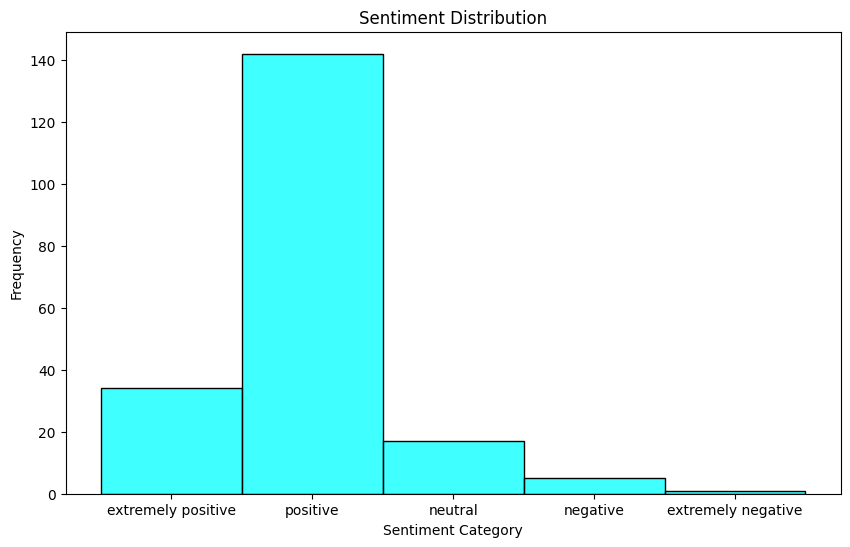

In [20]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6,))
sns.histplot(x=df.Sentiment_Class, color='Cyan')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Sentiment 

DistributionThe bar chart visualizes the distribution of sentiment categories in the dataset. 
The x-axis represents various sentiment categories, and the y-axis shows the frequency of occurrences in each category. The categories are as follows:

***Positive:*** The most frequent sentiment, with over 200 instances.

***Extremely*** Positive: This category follows, though it appears much less frequently than "Positive".

***Neutral:*** Appears less often than both positive categories.

***Negative:*** The least frequent sentiment in the dataset.

The chart clearly demonstrates a strong inclination towards positive sentiments, 
with "Positive" being the predominant category, followed by "Extremely Positive". 
Both neutral and negative sentiments occur much less frequently.

In [22]:
# Calculate the length of the sentences by calculating the number of words in the review sentence
df['Review_Length'] = df['reviews'].apply(lambda x: len(x.split()))

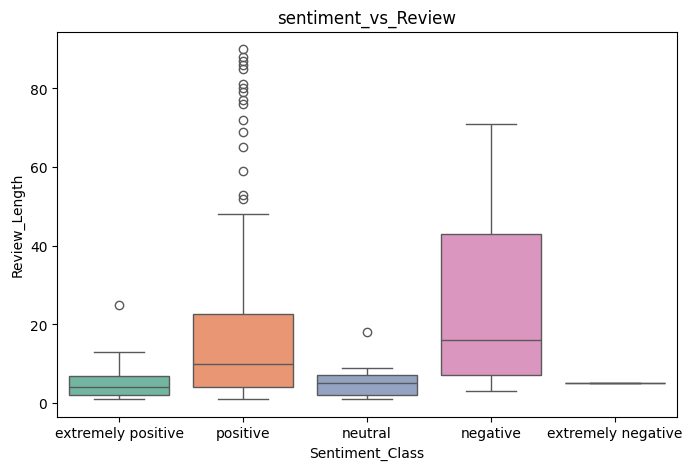

In [23]:
# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df, hue = 'Sentiment_Class', palette='Set2')
plt.xlabel("Sentiment_Class")
plt.ylabel("Review_Length")
plt.title("sentiment_vs_Review")
plt.show()

***Observations:***

***Positive Sentiment:***

Has the largest variability in review length, with several outliers.
The median is higher compared to other categories.

***Extremely Positive Sentiment:***

Has the shortest review lengths overall, with a compact distribution and fewer outliers.

***Neutral Sentiment:***

Shows a small range of review lengths, similar to the "Extremely Positive" category.

***Negative Sentiment:***

Exhibits a moderate range of review lengths.
The median review length is smaller than "Positive" but larger than 
"Extremely Positive" and "Neutral."

***Interpretation:***

Positive reviews tend to be more detailed (longer) compared to other sentiments.
Extremely positive and neutral reviews are often brief.
Negative reviews have varying lengths but are generally less wordy than positive reviews.

# 5. Reporting:

Summarize the findings in a clear, concise report with the following sections:

Overview of the data collection and cleaning process.

***Sentiment Analysis Results:*** Distribution of positive/negative reviews, average sentiment per rating, etc.

***Insights:*** Key trends from the sentiment analysis, such as common issues with the product or positive highlights.

***Recommendations:*** Based on customer sentiment, suggest improvements for the iPhone 15 128GB model or potential areas Flipkart can focus on for marketing.

**Customer Sentiment Analysis Report**

## 1. Overview of Data Collection and Cleaning

**Data Collection:**
- Reviews for the iPhone 15 128GB model were scraped from Flipkart using Selenium and BeautifulSoup.
- A total of 300+ reviews were extracted, containing usernames, ratings (1-5 stars), and review text.
- The scraper handled pagination to gather reviews from multiple pages.

**Data Cleaning:**
- Duplicates were removed to maintain data integrity.
- Missing values were addressed, and irrelevant characters were eliminated from the review text.
- Stop words were removed, and lemmatization was performed to enhance text processing.
- Ratings were standardized for consistency.

---

## 2. Sentiment Analysis Results

**Overall Sentiment Distribution:**
- The majority of the reviews were classified as **positive**.
- A smaller proportion of reviews were categorized as **extremely positive**.
- Neutral and negative reviews were significantly less frequent.

**Average Sentiment per Rating:**
- Higher ratings (4 and 5 stars) corresponded with **highly positive sentiment polarity**.
- Lower ratings (1 and 2 stars) were correlated with **negative sentiment polarity**.
- 3-star ratings exhibited a mix of neutral and slightly positive sentiments.

---

## 3. Insights

### **Key Trends Identified:**
1. **Positive Aspects:**
   - Customers praised the **camera quality**, **battery life**, and **overall design** of the iPhone 15.
   - Many reviews highlighted **smooth performance and seamless iOS experience**.
   - Delivery and packaging from Flipkart received positive feedback.

2. **Negative Aspects:**
   - Some users expressed disappointment over the **60Hz display refresh rate**, expecting a smoother experience.
   - **Heating issues** were reported by a small number of users, particularly during gaming or video streaming.
   - A few complaints were noted regarding **delivery delays and packaging damage**.

3. **Review Length Insights:**
   - Positive reviews tend to be longer and more descriptive.
   - Extremely positive and neutral reviews are often brief.
   - Negative reviews have a moderate length but are usually concise and to the point.

---

## 4. Recommendations

### **Product Improvements:**
- Address **display refresh rate concerns** in marketing communications or future models.
- Optimize **heat management** to improve long-term user satisfaction.
- Consider offering **improved trade-in or financing options** to attract more buyers.

### **Marketing & Customer Engagement Strategies:**
- Highlight positive aspects like **camera quality and battery life** in advertisements.
- Offer **personalized recommendations** based on customer sentiment data.
- Improve logistics and packaging to reduce complaints about **delivery issues**.

